In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"



In [2]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [3]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
city_ride_merged_data = pd.merge(ride_data,city_data, on="city",how='outer')

# Display the data table for preview
city_ride_merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


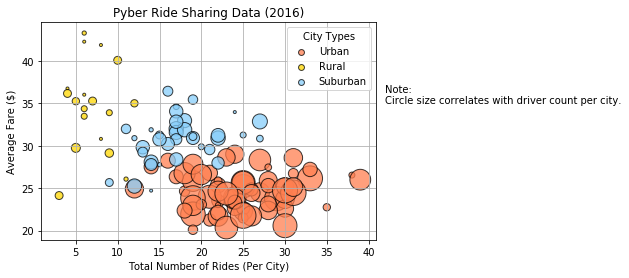

<Figure size 432x288 with 0 Axes>

In [29]:
##Bubble plot of ride sharing data 
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

#Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

#Total Number of Drivers Per City
urban_city_groupby = city_ride_merged_data[city_ride_merged_data["type"] == "Urban"].groupby([city_ride_merged_data["city"]])
rural_city_groupby = city_ride_merged_data[city_ride_merged_data["type"] == "Rural"].groupby([city_ride_merged_data["city"]])
suburban_city_groupby = city_ride_merged_data[city_ride_merged_data["type"] == "Suburban"].groupby([city_ride_merged_data["city"]])

# Average fare and driver count for urban city types plust the number of unique ride Id's
ride_urban = urban_city_groupby["ride_id"].nunique()
fare_urban = urban_city_groupby["fare"].mean()
driver_urban = urban_city_groupby["driver_count"].mean()

# Average fare and driver count for rural city types plust the number of unique ride Id's
ride_rural = rural_city_groupby["ride_id"].nunique()
fare_rural = rural_city_groupby["fare"].mean()
driver_rural = rural_city_groupby["driver_count"].mean()

# Average fare and driver count for suburban city types plust the number of unique ride Id's
ride_suburban = suburban_city_groupby["ride_id"].nunique()
fare_suburban = suburban_city_groupby["fare"].mean()
driver_suburban = suburban_city_groupby["driver_count"].mean()

# Building 3 scatter plots that layer on top of eachother. one for urban, one for rual and the final for suburban. 
# had to multiply the size of the dots by 9 because the otherwise the dots were too small. 
plt.scatter(ride_urban, fare_urban, label = "Urban", s=driver_urban * 9, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(ride_rural, fare_rural, label = "Rural", s=driver_rural * 9, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(ride_suburban, fare_suburban, label = "Suburban", s=driver_suburban * 9, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")


# Adding x and y axis labels as well as a chart tile
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 10, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [35]
legend.legendHandles[1]._sizes = [35]
legend.legendHandles[2]._sizes = [35]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("/Users/ncabayan/Desktop/PyberBubbleChart.png", bbox_inches="tight")

# Show plot
plt.grid()
plt.show()
plt.tight_layout()

In [6]:
##PIE CHARTS TO MAKE
#% of Total Fares by City Type
city_type_groups= city_ride_merged_data.groupby(["type"])
total_fare_by_city_type=(city_type_groups["fare"].sum())
total_fare = (city_ride_merged_data["fare"].sum())
Percent_total_fares_by_city_type = ((total_fare_by_city_type/total_fare)*100)




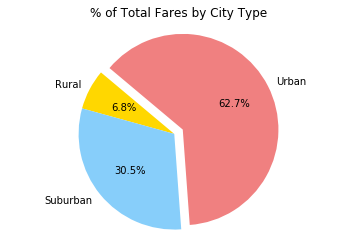

In [30]:
type_labels = ["Rural","Suburban","Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Fares by City Type")

plt.pie(Percent_total_fares_by_city_type, explode=explode, labels = type_labels, colors = colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.axis("equal")

# Save figure and show it
plt.savefig("/Users/ncabayan/Desktop/PyberFaresByCityType.png", bbox_inches="tight")
plt.show()

In [8]:
##PIE CHARTS TO MAKE
#% of Total Rides by City Type
total_rides_by_city_type=(city_type_groups["ride_id"].nunique())
total_rides = (city_ride_merged_data["ride_id"].nunique())
Percent_total_rides_by_city_type = ((total_rides_by_city_type/total_rides)*100)
Percent_total_rides_by_city_type

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

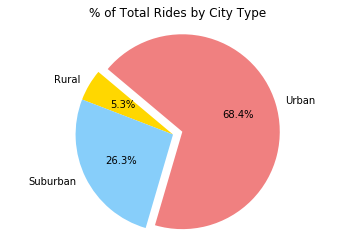

In [31]:
plt.title("% of Total Rides by City Type")

plt.pie(Percent_total_rides_by_city_type, explode=explode, labels = type_labels, colors = colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.axis("equal")


# Save figure and show it
plt.savefig("/Users/ncabayan/Desktop/PyberRidesByCityType.png", bbox_inches="tight")
plt.show()

In [10]:
##PIE CHARTS TO MAKE
#% of Total Drivers by City Type
city_data_type_groups = city_data.groupby(["type"])
total_drivers_by_city_type=(city_data_type_groups["driver_count"].sum())
total_drivers = (city_data["driver_count"].sum())
Percent_total_drivers_by_city_type = ((total_drivers_by_city_type/total_drivers)*100)
Percent_total_drivers_by_city_type

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

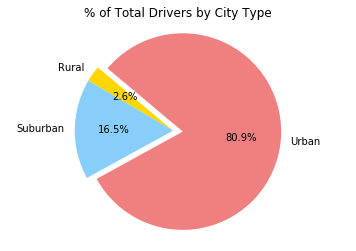

In [32]:
plt.title("% of Total Drivers by City Type")

plt.pie(Percent_total_drivers_by_city_type, explode=explode, labels = type_labels, colors = colors,
        autopct="%1.1f%%", shadow=False, startangle=140)
plt.axis("equal")


# Save figure and show it
plt.savefig("/Users/ncabayan/Desktop/PyberDriversByCityType.png", bbox_inches="tight")
plt.show()